Run Priority flood and D8 accumulation on the test data set

In [1]:
import richdem as rd

In [2]:
fl = './data/cedar2m/hdr.adf'

In [3]:
dem = rd.LoadGDAL(fl)

In [5]:
rd.BreachDepressions(dem,in_place=True)
accumD8 = rd.FlowAccumulation(dem,method='D8')

MemoryError: 

In [1]:
import richdem as rd
import rasterio as rs

def write_rast(outfl,profile,dat):
    '''Write out a raster based on the geospatial data from another raster
    Inputs:
    outfl = raster to write out
    profile = geospatial profile
    dat = array to write out
    
    Outputs: 
    None
    '''
    n,m = dat.shape
    dat = np.reshape(dat,(m,n))
    
        
    with rs.open(outfl,'w',**profile) as dst: # write the new raster based on the profile
        dst.write(dat,1)
        

In [15]:
fl = './data/test_data_float.tiff'

In [21]:
%%timeit -n 1 -r 1
dem = rd.LoadGDAL(fl)
#rd.FillDepressions(dem,epsilon=True, in_place=True)
rd.BreachDepressions(dem,mode='Complete',in_place=True)
accumD8 = rd.FlowAccumulation(dem,method='D8')
rd.SaveGDAL('./data/test_data_rd_accumd8.tiff',accumD8)

RuntimeError: 

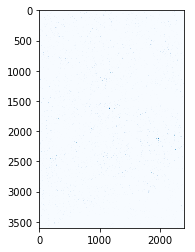

In [19]:
plt.imshow(accumD8, cmap='Blues')

In [17]:
accumD8.dtype

dtype('float64')